In [1]:
library(tidyverse)

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
proportions_df = read.csv("04B_overlap_percentage_fetal_disease.csv")
proportions_df

X,cell_type,category,value,direction,contrast
<int>,<chr>,<chr>,<dbl>,<chr>,<chr>
0,Cardiomyocyte,overlap_up_disease,35.0449294,up,disease
1,Endothelial,overlap_up_disease,28.4516129,up,disease
2,Fibroblast,overlap_up_disease,38.5249458,up,disease
3,Lymphoid,overlap_up_disease,NA,up,disease
4,Myeloid,overlap_up_disease,2.1978022,up,disease
5,Pericyte,overlap_up_disease,44.4444444,up,disease
6,Cardiomyocyte,overlap_down_disease,52.5177173,down,disease
7,Endothelial,overlap_down_disease,40.7538280,down,disease
8,Fibroblast,overlap_down_disease,61.4718615,down,disease


Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_bar()`).”


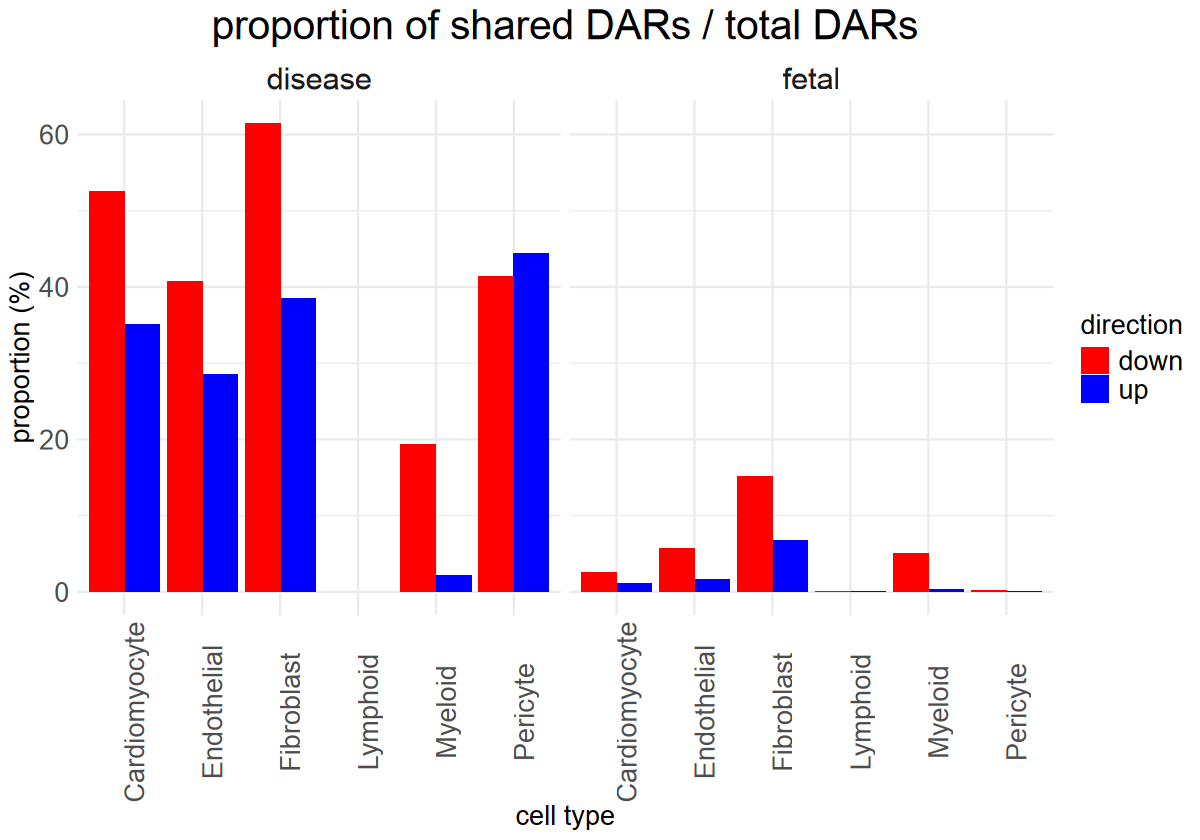

In [4]:
options(repr.plot.width = 10, repr.plot.height = 7)

p1 <- ggplot(data = proportions_df, mapping = aes(x = cell_type, y= value, fill = direction)) + 
facet_wrap(~contrast, ncol = 2) + geom_bar(stat = "identity", position = "dodge") + theme_minimal() + 
geom_bar(stat = "identity", position = "dodge")  + scale_fill_manual(values = c("down" = "red", "up" = "blue")) + 
theme(legend.text = element_text(size = 16), 
         legend.title = element_text(size = 16), 
         plot.title = element_text(size = 24, hjust = 0.5), 
         axis.title.x = element_text(size = 16),
         axis.title.y = element_text(size = 16),
         axis.text.x = element_text(size = 16, angle = 90),
         axis.text.y = element_text(size = 16),
	 strip.text = element_text(size = 18)) + labs(x = "cell type", y = "proportion (%)", 
                                                  title = "proportion of shared DARs / total DARs")

plots_dir = "../../../paper_figures/"
ggsave(p1, filename = paste0(plots_dir, "DAR_overlap_proportion_for_fetalization.pdf"), height = 7, width = 10)

p1